# Introduction to deep learning in python with keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../../Data/data.csv")
df.drop(["num", "Name", "Type 1", "Type 2", "Total"], axis=1, inplace=True)
df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,45,49,49,65,65,45,1,False
1,60,62,63,80,80,60,1,False
2,80,82,83,100,100,80,1,False
3,80,100,123,122,120,80,1,False
4,39,52,43,60,50,65,1,False


## Binary classification

In [4]:
target = "Legendary"

y = df[target].copy()
X = df.drop([target], axis=1)

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


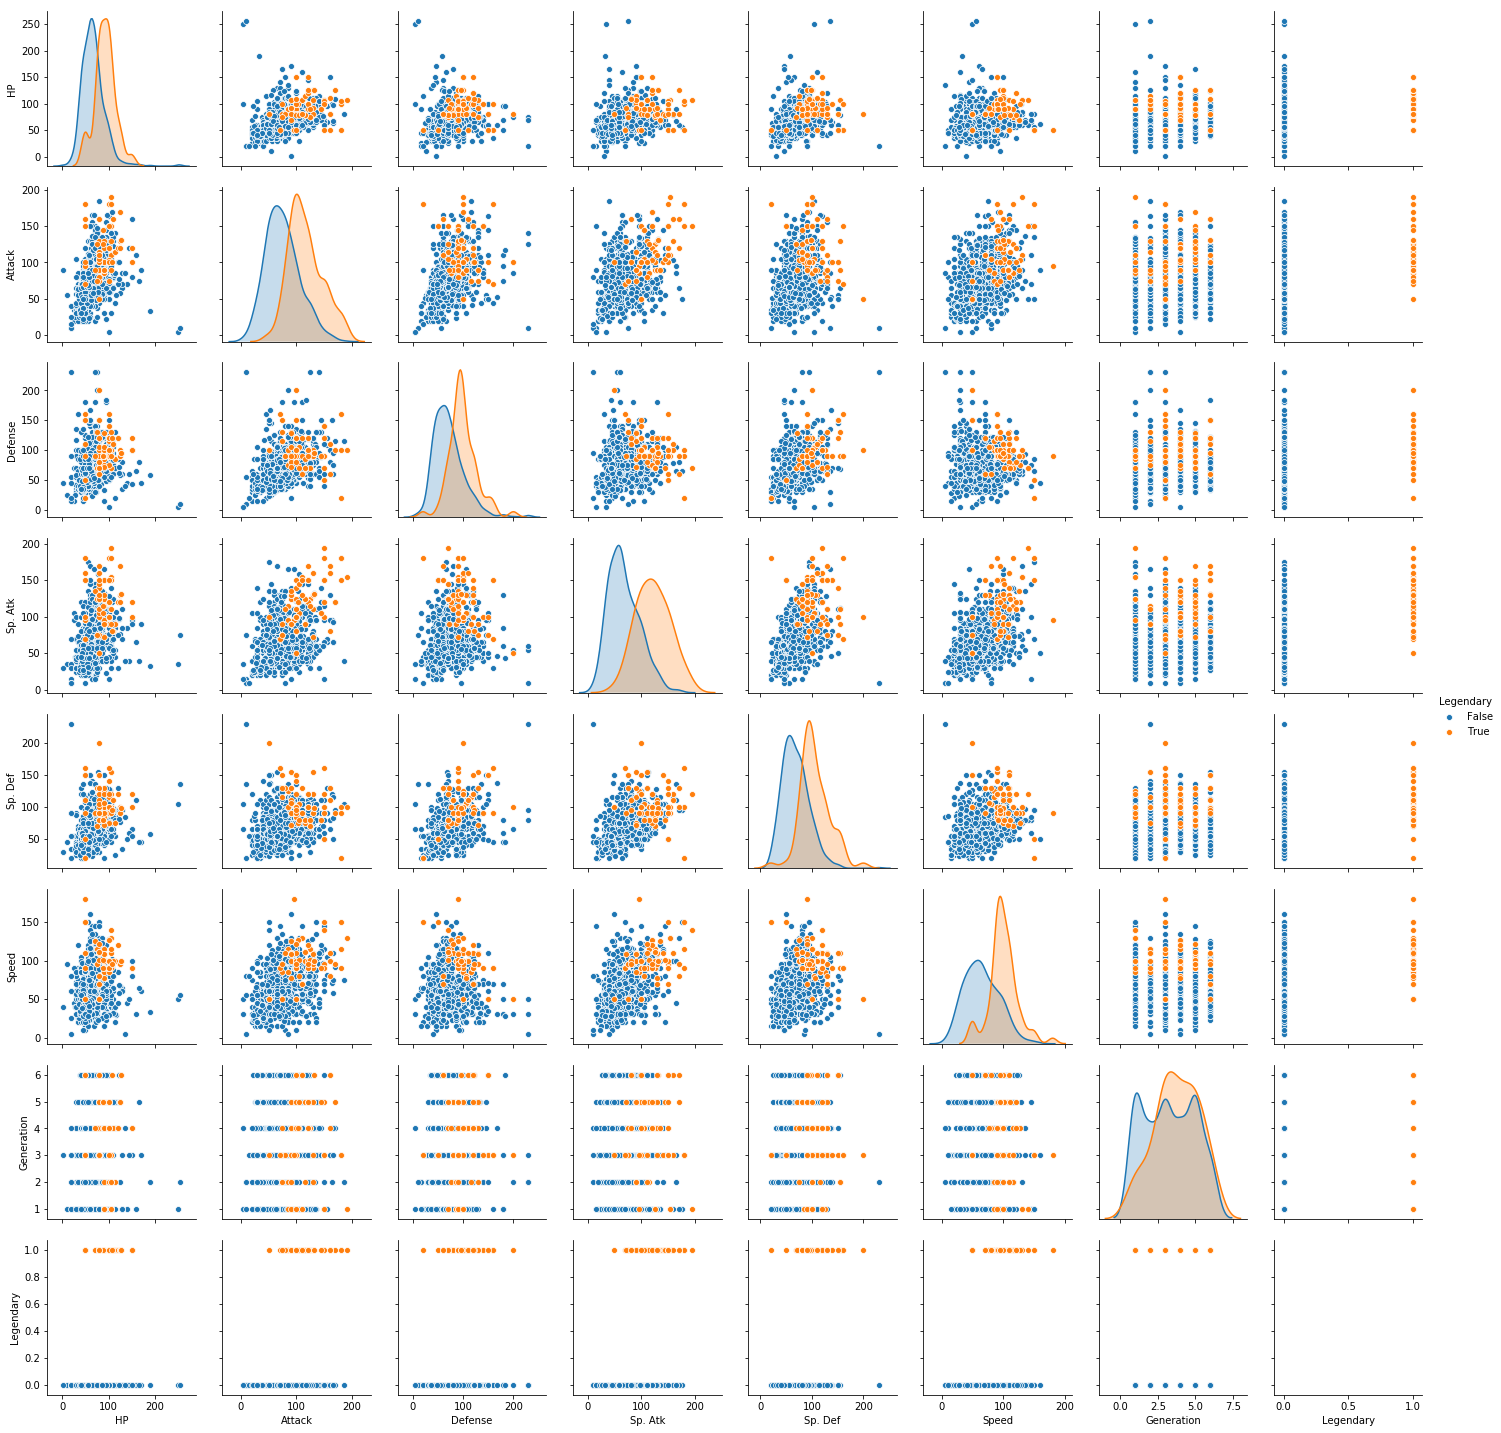

Dataset stats: 
                HP      Attack     Defense     Sp. Atk     Sp. Def       Speed  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean    69.258750   79.001250   73.842500   72.820000   71.902500   68.277500   
std     25.534669   32.457366   31.183501   32.722294   27.828916   29.060474   
min      1.000000    5.000000    5.000000   10.000000   20.000000    5.000000   
25%     50.000000   55.000000   50.000000   49.750000   50.000000   45.000000   
50%     65.000000   75.000000   70.000000   65.000000   70.000000   65.000000   
75%     80.000000  100.000000   90.000000   95.000000   90.000000   90.000000   
max    255.000000  190.000000  230.000000  194.000000  230.000000  180.000000   

       Generation  
count   800.00000  
mean      3.32375  
std       1.66129  
min       1.00000  
25%       2.00000  
50%       3.00000  
75%       5.00000  
max       6.00000  
Observations per class: 
 False    735
True      65
Name: Legendary, dtyp

In [5]:
import seaborn as sns

sns.pairplot(df, hue=target) 

# Show the plot
plt.show()

# Describe the data
print('Dataset stats: \n', df.describe())

# Count the number of observations per class
print('Observations per class: \n', df[target].value_counts())

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, stratify=y)

In [8]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_shape = (len(X_train.columns), ), activation = "tanh"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Display a summary of your model
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X_train, y_train, epochs = 10, verbose=1, batch_size=8)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy: {:.1%}'.format(accuracy))

Epoch 1/10
560/560 [==============================] - 0s 708us/step - loss: 0.6179 - acc: 0.6839
Epoch 2/10
560/560 [==============================] - 0s 124us/step - loss: 0.4776 - acc: 0.8857
Epoch 3/10
560/560 [==============================] - 0s 118us/step - loss: 0.3874 - acc: 0.9196
Epoch 4/10
560/560 [==============================] - 0s 117us/step - loss: 0.3146 - acc: 0.9393
Epoch 5/10
560/560 [==============================] - 0s 111us/step - loss: 0.2584 - acc: 0.9446
Epoch 6/10
560/560 [==============================] - 0s 113us/step - loss: 0.2177 - acc: 0.9500
Epoch 7/10
560/560 [==============================] - 0s 117us/step - loss: 0.1891 - acc: 0.9482
Epoch 8/10
560/560 [==============================] - 0s 121us/step - loss: 0.1690 - acc: 0.9518
Epoch 9/10
560/560 [==============================] - 0s 119us/step - loss: 0.1549 - acc: 0.9429
Epoch 10/10
240/240 [==============================] - 0s 168us/step
Accuracy: 94.2%


## Multiclass classification

In [13]:
df = pd.read_csv("../../Data/data.csv")
df.drop(["num", "Name", "Type 2", "Total"], axis=1, inplace=True)
df.head()

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,45,49,49,65,65,45,1,False
1,Grass,60,62,63,80,80,60,1,False
2,Grass,80,82,83,100,100,80,1,False
3,Grass,80,100,123,122,120,80,1,False
4,Fire,39,52,43,60,50,65,1,False


In [28]:
from keras.utils import to_categorical
target = "Type 1"

df[target] = pd.Categorical(df[target])
df[target] = df[target].cat.codes

y = to_categorical(df[target]) #ohe
X = df.drop([target], axis=1)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, stratify=y)

In [62]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_shape = (len(X_train.columns), ), activation = "tanh"))
model.add(Dense(y_train.shape[1], activation = "softmax"))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# Display a summary of your model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_19 (Dense)             (None, 18)                306       
Total params: 450
Trainable params: 450
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
560/560 [==============================] - 0s 727us/step - loss: 2.8660 - acc: 0.1036
Epoch 2/100
560/560 [==============================] - 0s 130us/step - loss: 2.7898 - acc: 0.1143
Epoch 3/100
560/560 [==============================] - 0s 122us/step - loss: 2.7284 - acc: 0.1411
Epoch 4/100
560/560 [==============================] - 0s 129us/step - loss: 2.6768 - acc: 0.1482
Epoch 5/100
560/560 [==============================] - 0s 125us/step - loss: 2.6307 - acc: 0.1768
Epoch 6/100
560/560 [==============================] - 0s 128us/step - loss: 2.5895 - acc: 0.1911
Epoch 7/100
560/560 [==============================] - 0s 123us/step - loss: 2.5542 - acc: 0.1839
Epoch 8/100
560/560 [==============================] - 0s 121us/step - loss: 2.5211 - acc: 0.1946
Epoch 9/100
560/560 [==============================] - 0s 124us/step - loss: 2.4913 - acc: 0.2089
Epoch 10/100
560/560 [==============================] - 0s 128us/step - loss: 2.4655 - acc: 0.2179
Epoch 11/100
560/56

(0, 1)

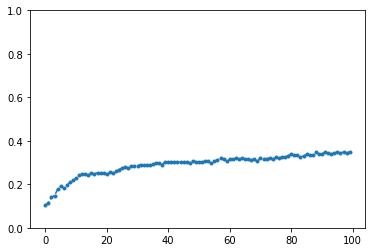

In [63]:
x = model.fit(X_train, y_train, epochs = 100, verbose=1, batch_size=8)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy: {:.1%}'.format(accuracy))

plt.plot(x.epoch, x.history["acc"], '.--')
plt.ylim([0,1])

## Mutli label classification

In [95]:
df = pd.read_csv("../../Data/data.csv")
df.drop(["num", "Name", "Total"], axis=1, inplace=True)
df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,45,49,49,65,65,45,1,False
1,Grass,Poison,60,62,63,80,80,60,1,False
2,Grass,Poison,80,82,83,100,100,80,1,False
3,Grass,Poison,80,100,123,122,120,80,1,False
4,Fire,NaN,39,52,43,60,50,65,1,False


In [104]:
df["Type 1"] = pd.Categorical(df["Type 1"])
df["Type 2"] = pd.Categorical(df["Type 2"], categories=df["Type 1"].cat.categories)

In [109]:
y = to_categorical(df["Type 1"].cat.codes) + to_categorical(df["Type 2"].cat.codes)
X = df.drop(["Type 1", "Type 2"], axis=1)

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)

In [133]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_shape = (len(X_train.columns), ), activation = "relu"))
model.add(Dense(y_train.shape[1], activation = "sigmoid")) # difference with multi class

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Display a summary of your model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_23 (Dense)             (None, 18)                306       
Total params: 450
Trainable params: 450
Non-trainable params: 0
_________________________________________________________________


Train on 448 samples, validate on 112 samples
Epoch 1/100
448/448 [==============================] - 0s 142us/step - loss: 0.2439 - acc: 0.9008 - val_loss: 0.2434 - val_acc: 0.9058
Epoch 2/100
448/448 [==============================] - 0s 150us/step - loss: 0.2435 - acc: 0.9017 - val_loss: 0.2446 - val_acc: 0.9062
Epoch 3/100
448/448 [==============================] - 0s 138us/step - loss: 0.2431 - acc: 0.9023 - val_loss: 0.2461 - val_acc: 0.9053
Epoch 4/100
448/448 [==============================] - 0s 141us/step - loss: 0.2429 - acc: 0.9017 - val_loss: 0.2468 - val_acc: 0.9048
Epoch 5/100
448/448 [==============================] - 0s 146us/step - loss: 0.2424 - acc: 0.9022 - val_loss: 0.2473 - val_acc: 0.9038
Epoch 6/100
448/448 [==============================] - 0s 156us/step - loss: 0.2423 - acc: 0.9028 - val_loss: 0.2483 - val_acc: 0.9043
Epoch 7/100
448/448 [==============================] - 0s 148us/step - loss: 0.2422 - acc: 0.9019 - val_loss: 0.2487 - val_acc: 0.9038
Epoch 8/1

Epoch 61/100
448/448 [==============================] - 0s 145us/step - loss: 0.2337 - acc: 0.9033 - val_loss: 0.2580 - val_acc: 0.9003
Epoch 62/100
448/448 [==============================] - 0s 159us/step - loss: 0.2336 - acc: 0.9036 - val_loss: 0.2581 - val_acc: 0.8998
Epoch 63/100
448/448 [==============================] - 0s 157us/step - loss: 0.2335 - acc: 0.9035 - val_loss: 0.2583 - val_acc: 0.8998
Epoch 64/100
448/448 [==============================] - 0s 157us/step - loss: 0.2335 - acc: 0.9028 - val_loss: 0.2581 - val_acc: 0.9003
Epoch 65/100
448/448 [==============================] - 0s 147us/step - loss: 0.2333 - acc: 0.9039 - val_loss: 0.2583 - val_acc: 0.8993
Epoch 66/100
448/448 [==============================] - 0s 146us/step - loss: 0.2331 - acc: 0.9034 - val_loss: 0.2585 - val_acc: 0.8998
Epoch 67/100
448/448 [==============================] - 0s 154us/step - loss: 0.2331 - acc: 0.9039 - val_loss: 0.2584 - val_acc: 0.9003
Epoch 68/100
448/448 [==========================

(0, 1)

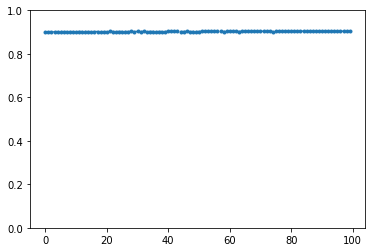

In [147]:
x = model.fit(X_train, y_train, epochs = 100, verbose=1, batch_size=8, validation_split=0.2)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy: {:.1%}'.format(accuracy))

plt.plot(x.epoch, x.history["acc"], '.--')
plt.ylim([0,1])

In [146]:
preds = model.predict(X_test)
preds_rounded = np.round(preds)
preds_rounded[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.]], dtype=float32)